# Kernel Methods

Content:
* Kernel Regression
    * Compute Gram Matrix
    * Estimate the target values for a new set of data points
    * Plot the (x_new, t_new)-pairs on top of the original data
    * Play around with the kernel $\sigma$. How does the fit look using $\sigma=1$ as compared to  $\sigma=10$?


In [1]:
# Dependencies
import numpy as np
import pandas as pd
import scipy
from sklearn.decomposition import PCA 
import matplotlib.pyplot as plt 
import seaborn as sns; sns.set();

# 1) Kernel Regression

We'll be working with two variable from the [Boston housing dataset](https://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html).

In [2]:
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

x = data[:,12] # LSTAT: % lower status of the population.
t = target # MEDV: Median value of owner-occupied homes in $1000s.

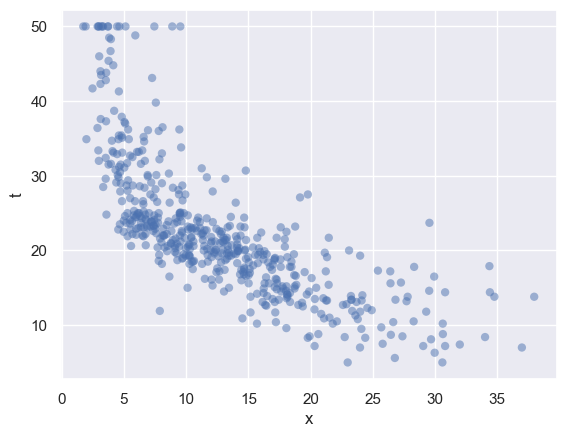

In [3]:
def plot_scatter(data, target, alpha=0.5, legend=True):
    scatter = plt.scatter(data, target,  edgecolor='none', alpha=alpha)
    plt.xlabel('x')
    plt.ylabel('t')

# Let's plot all the data in 2D
plot_scatter(x, t)

## 1.1) The kernel gram matrix
Using the Gaussian Kernel based on Euclidean distance with $\sigma = 2$.

In [4]:
sigma = 2

In [5]:
# Compute Gram matrix for all samples

# RBF Kernel Function
def rbf_kernel(x1, x2, sigma):
    return np.exp(-np.linalg.norm(x1 - x2)**2 / (2 * sigma**2))

# Compute the Gram matrix for all samples
def compute_gram_matrix(x, sigma):
    n_samples = x.shape[0]
    K = np.zeros((n_samples, n_samples))
    for i in range(n_samples):
        for j in range(n_samples):
            K[i, j] = rbf_kernel(x[i], x[j], sigma)
    return K

K = compute_gram_matrix(x, sigma) # first 5 samples
print("shape = {}".format(K.shape))

shape = (506, 506)


## 1.2) Target values for a new set of data points

In [6]:
l = 0.001 # lambda
sigma = 2
x_new = np.linspace(0, 40, 100) # Range in which to compute estimated values

In [7]:
# Function to perform kernel regression
def kernel_regression(K, x, x_new, t, sigma, l):
    n_samples = x.shape[0]
    n_new_samples = x_new.shape[0]
    K_new = np.zeros((n_new_samples, n_samples))

    for i in range(n_new_samples):
        for j in range(n_samples):
            K_new[i, j] = rbf_kernel(x_new[i], x[j], sigma)

    # Kernel regression formula
    t_new = K_new @ np.linalg.inv(K + l * np.eye(n_samples)) @ t
    return t_new
    
# Parameters for kernel regression
l = 0.001  # lambda
sigma = 2

x_new = np.linspace(0, 40, 100)  # Range in which to compute estimated values

# Perform kernel regression to estimate new values with the sample data
t_new = kernel_regression(K, x, x_new, t, sigma, l)

## 1.3) Plot of the (x_new, t_new)-pairs on top of the original data

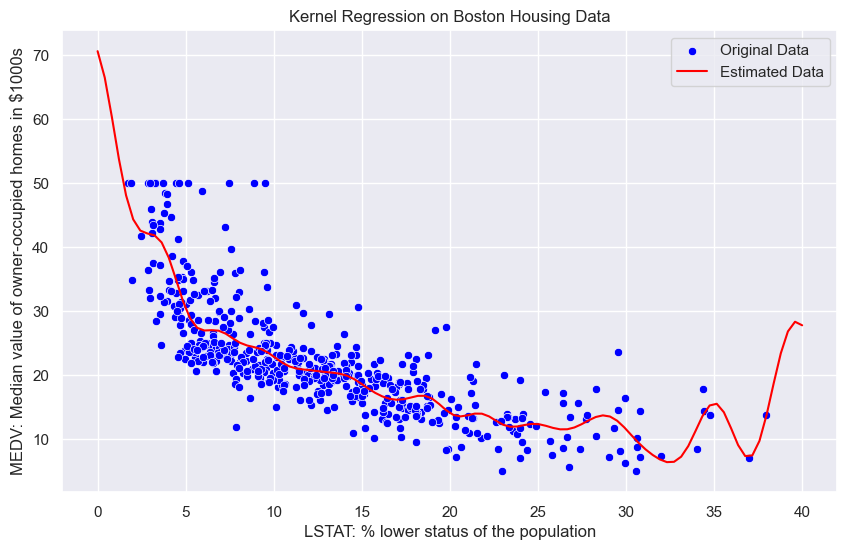

In [8]:
# Plotting the original data
plt.figure(figsize=(10, 6))
sns.scatterplot(x=x, y=t, color='blue', label='Original Data')

# Plotting the estimated data
sns.lineplot(x=x_new, y=t_new, color='red', label='Estimated Data')

# Adding title and labels
plt.title('Kernel Regression on Boston Housing Data')
plt.xlabel('LSTAT: % lower status of the population')
plt.ylabel('MEDV: Median value of owner-occupied homes in $1000s')
plt.legend()

# Show the plot
plt.show()

## 1.4) Playing around with the kernel $\sigma$.

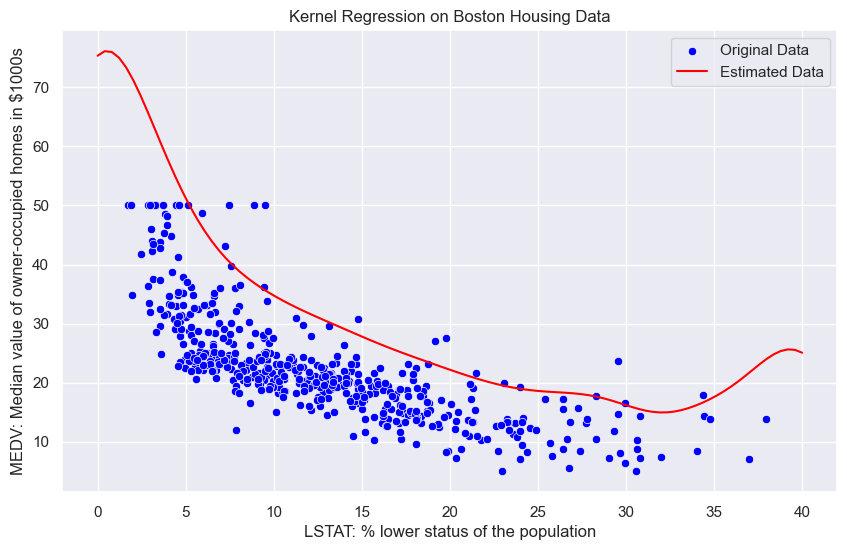

In [9]:
sigma = 3
t_new = kernel_regression(K, x, x_new, t, sigma, l)

# Plotting the original data
plt.figure(figsize=(10, 6))
sns.scatterplot(x=x, y=t, color='blue', label='Original Data')

# Plotting the estimated data
sns.lineplot(x=x_new, y=t_new, color='red', label='Estimated Data')

# Adding title and labels
plt.title('Kernel Regression on Boston Housing Data')
plt.xlabel('LSTAT: % lower status of the population')
plt.ylabel('MEDV: Median value of owner-occupied homes in $1000s')
plt.legend()

# Show the plot
plt.show()

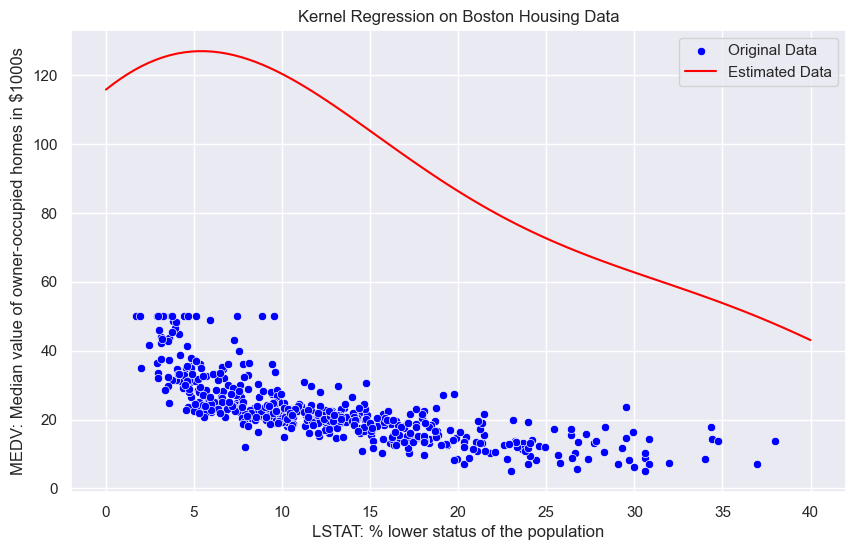

In [10]:
sigma = 10
t_new = kernel_regression(K, x, x_new, t, sigma, l)

# Plotting the original data
plt.figure(figsize=(10, 6))
sns.scatterplot(x=x, y=t, color='blue', label='Original Data')

# Plotting the estimated data
sns.lineplot(x=x_new, y=t_new, color='red', label='Estimated Data')

# Adding title and labels
plt.title('Kernel Regression on Boston Housing Data')
plt.xlabel('LSTAT: % lower status of the population')
plt.ylabel('MEDV: Median value of owner-occupied homes in $1000s')
plt.legend()

# Show the plot
plt.show()